# Lifestyle and Health Risk EDA

In [1]:
#Importing the data for setup!
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("miadul/lifestyle-and-health-risk-prediction")

# print("Path to dataset files:", path)

### Importing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv')
print(df.head())

   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  


### Initial Insights

In [3]:
print('Dataframe Info:')
print('Amount of Rows: ', len(df))
print('Amount of Columns: ', len(df.columns))
print('\nOverall Information:')
print(df.info())

Dataframe Info:
Amount of Rows:  5000
Amount of Columns:  12

Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB
None


In [4]:
print('Value Counts of categorical features:')
print('\n', df['exercise'].value_counts())
print('\n', df['sugar_intake'].value_counts())
print('\n', df['smoking'].value_counts())
print('\n', df['alcohol'].value_counts())
print('\n', df['married'].value_counts())
print('\n', df['profession'].value_counts())
print('\n', df['health_risk'].value_counts())

Value Counts of categorical features:

 exercise
medium    1985
low       1272
high      1000
none       743
Name: count, dtype: int64

 sugar_intake
medium    2511
low       1484
high      1005
Name: count, dtype: int64

 smoking
no     4023
yes     977
Name: count, dtype: int64

 alcohol
no     3741
yes    1259
Name: count, dtype: int64

 married
yes    3018
no     1982
Name: count, dtype: int64

 profession
student          644
farmer           639
driver           631
doctor           630
artist           626
engineer         616
teacher          612
office_worker    602
Name: count, dtype: int64

 health_risk
high    3490
low     1510
Name: count, dtype: int64


In [5]:
print('Numerical Feature Ranges:')
print(f'Age Range: {df['age'].min()} - {df['age'].max()}')
print(f'Weight Range: {df['weight'].min()} - {df['weight'].max()}')
print(f'Height Range: {df['height'].min()} - {df['height'].max()}')
print(f'Sleep Range: {df['sleep'].min()} - {df['sleep'].max()}')
print(f'BMI Range: {df['bmi'].min()} - {df['bmi'].max()}')

print('\nThe dataframe described:')
df.describe()

Numerical Feature Ranges:
Age Range: 18 - 79
Weight Range: 45 - 109
Height Range: 145 - 199
Sleep Range: 3.0 - 10.0
BMI Range: 11.4 - 51.4

The dataframe described:


,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


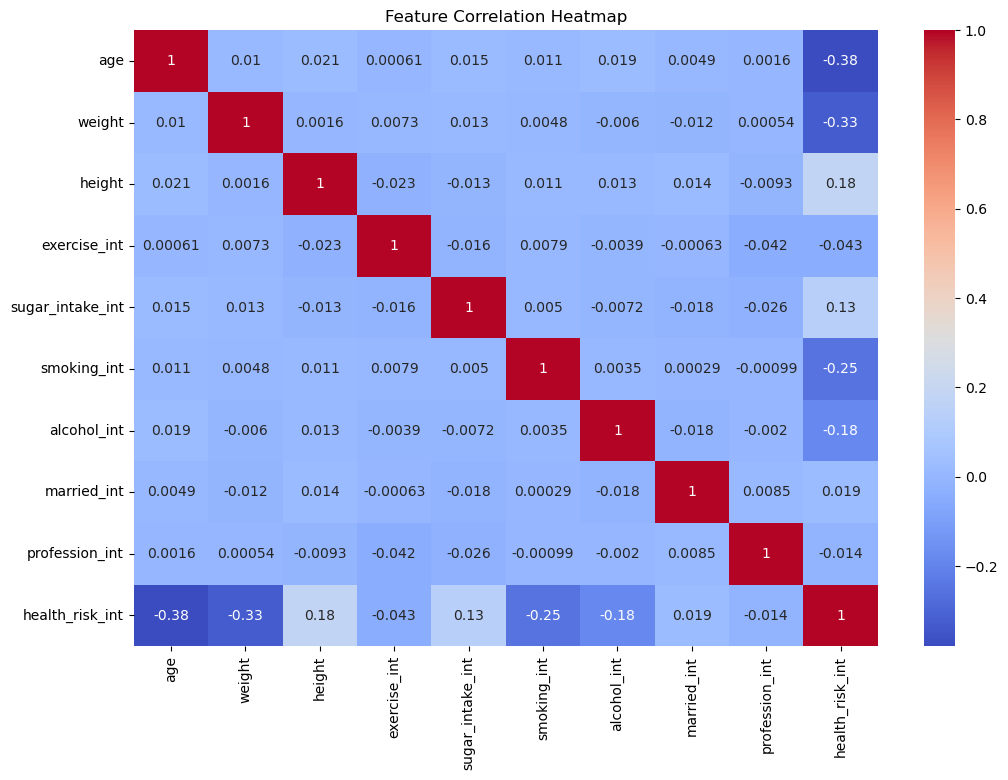

In [ ]:
#df.corr cant handle category features, going to adjust them into numerical form so we can get a correlation matrix heatmap
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['exercise_int'] = le.fit_transform(df['exercise'])
df['sugar_intake_int'] = le.fit_transform(df['sugar_intake'])
df['smoking_int'] = le.fit_transform(df['smoking'])
df['alcohol_int'] = le.fit_transform(df['alcohol'])
df['married_int'] = le.fit_transform(df['married'])
df['profession_int'] = le.fit_transform(df['profession'])
df['health_risk_int'] = le.fit_transform(df['health_risk'])

numerical_features = ['age', 'weight', 'height', 'exercise_int', 'sugar_intake_int', 'smoking_int', 'alcohol_int', 'married_int', 'profession_int', 'health_risk_int']
correlation_matrix = df[numerical_features].corr()

#The numbers were overlapping so the figure is 12 by 8
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()